<a href="https://colab.research.google.com/github/KS0999/ML/blob/main/ComputerVision_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import pathlib as path
import os
import requests

In [72]:
train_data = torchvision.datasets.FashionMNIST(root="data",
                                               train=True, # want train or no?
                                               download=True, # download or not?
                                               transform=torchvision.transforms.ToTensor(), # transform the data ? (X)
                                               target_transform=None) # tranform the target/label ? (y)
test_data = torchvision.datasets.FashionMNIST(root="data",
                                               train=False,
                                               download=True,
                                               transform=torchvision.transforms.ToTensor(),
                                               target_transform=None)

In [73]:
len(train_data),len(test_data)

(60000, 10000)

In [74]:
train_class = train_data.classes # check the item name
train_class

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [75]:
train_class_to_idx = train_data.class_to_idx # use the dict format to see the number of item
train_class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [76]:
image,label = train_data[10] # some information about train data
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431,
           0.5569, 0.7843, 0.4157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.3333, 0.7255, 0.4392, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5961, 0.8392,
           0.8510, 0.7608, 0.9255, 0.8471, 0.7333, 0.5843, 0.5294, 0.6000,
           0.8275, 0.8510, 0.9059, 0.8039, 0.8510, 0.7373, 0.1333, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2588, 0.7255, 0.6510,
           0.7059, 0.7098, 0.7451, 0.8275, 0.8667, 0.7725, 0.5725, 0.7765,
           0.8078, 0.7490, 0.6588, 0.7451, 0.6745, 0.7373, 0.6863, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5294, 0.6000, 0.6275,
           0.6863, 0.7059, 0.6667, 0.7294, 0.7333, 0.7451, 0.7373, 0.7451,
           0.7333, 0.6824, 0.7647, 0.7255, 

In [77]:
train_data.resources # u can see same thing on the root

[('train-images-idx3-ubyte.gz', '8d4fb7e6c68d591d4c3dfef9ec88bf0d'),
 ('train-labels-idx1-ubyte.gz', '25c81989df183df01b3e8a0aad5dffbe'),
 ('t10k-images-idx3-ubyte.gz', 'bef4ecab320f06d8554ea6380940ec79'),
 ('t10k-labels-idx1-ubyte.gz', 'bb300cfdad3c16e7a12a480ee83cd310')]

In [78]:
train_data.mirrors # train source url

['http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/']

In [79]:
train_data.targets # corresponsing to "Ankle boot" which is the item of dict

tensor([9, 0, 0,  ..., 3, 0, 5])

In [80]:
train_data.transforms # some information about "Transforms", u can initializtion setting before create the train data

StandardTransform
Transform: ToTensor()

In [81]:
print(f"image's shape {image.shape}") # [color channel, height, width]
print(f"label : {train_class[label]}")

image's shape torch.Size([1, 28, 28])
label : T-shirt/top


image's shapetorch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

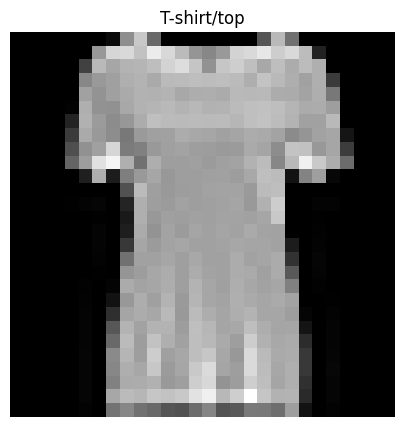

In [82]:
# use matplotlib to show the image
print(f"image's shape{image.shape}")
plt.figure(figsize=(5,5))
plt.imshow(image.squeeze(),cmap="gray") # u have to remove the color channel or u will get an error (shape's error)
plt.title(train_class[label])
plt.axis(False)

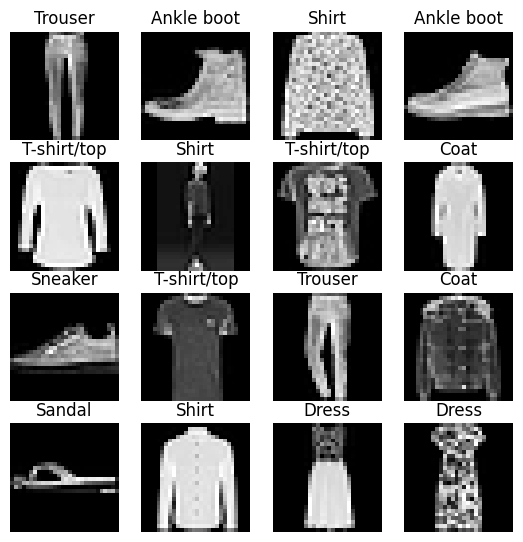

In [83]:
row, column = 4,4
plt.figure(figsize=(6.5,6.5)) # if picture's text will cut other's picture to slove this issue u can adjust `figsize`
for idx in range(1,row*column+1):
  random = torch.randint(1,len(train_data),size=[1]).item()
  image,label = train_data[random]
  plt.subplot(row,column,idx) # use subplot to plot the figure
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(train_class[label])
  plt.axis(False)

In [84]:
from torch.utils.data import DataLoader

Batch_size = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=Batch_size,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=Batch_size,
                              shuffle=False)

In [85]:
print(f"Train_DataLoader:{train_dataloader},len is about:{len(train_dataloader)}")
print(f"Test_DataLoader:{test_dataloader} ,len is about:{len(test_dataloader)}")

Train_DataLoader:<torch.utils.data.dataloader.DataLoader object at 0x7caccbb8c550>,len is about:1875
Test_DataLoader:<torch.utils.data.dataloader.DataLoader object at 0x7caccbb8dc90> ,len is about:313


In [86]:
print(f"view the train_data's mini batch size {Batch_size}\n{train_data}\nNow after DataLoader the len of train_data is {len(train_dataloader)}")
print("-"*50)
print(f"32 x 1875 = {32*1875}\nso if we follow the train Loop and rule u can find our `EPOCH` is changing!")
print("Model is the same concept as Train dataloader")

view the train_data's mini batch size 32
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Now after DataLoader the len of train_data is 1875
--------------------------------------------------
32 x 1875 = 60000
so if we follow the train Loop and rule u can find our `EPOCH` is changing!
Model is the same concept as Train dataloader


In [87]:
train_feature,train_label = next(iter(train_dataloader)) # iter -> converted `train_dataloader` into an iterate
print(train_feature.shape)                               # next -> find next dataloader's data
print(train_label.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


(-0.5, 27.5, 27.5, -0.5)

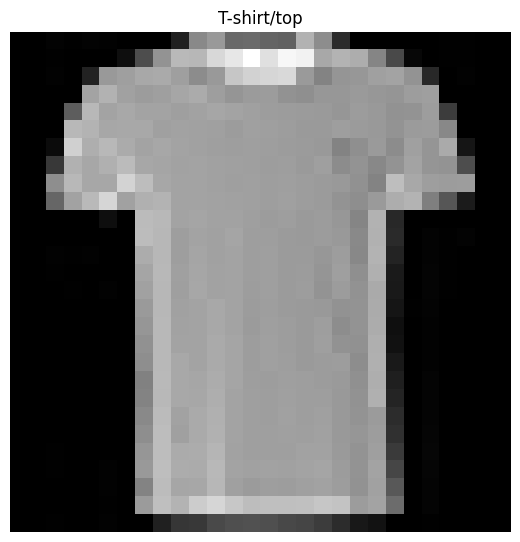

In [88]:
# see the train_features's picture (after Dataloader)
rand_idx = torch.randint(0,len(train_feature),size=[1]).item()
image_dataloader,label_dataloader = train_feature[rand_idx],train_label[rand_idx]
plt.figure(figsize=(6.5,6.5))
plt.imshow(image_dataloader.squeeze(),cmap="gray")
plt.title(train_class[label_dataloader])
plt.axis(False)

In [89]:
model = nn.Flatten()
x = train_feature[0]
y = model(x)
print(x.shape) # we use `nn.Flatten()` to flatten picture's pixels (from 28x28 to 784)
print(y.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [90]:
class fashionMNIST(nn.Module):
  def __init__(self,input_shape: int,hidden_unit: int,output_shape: int):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Flatten(), # [batch_size, size]
        nn.Linear(in_features = input_shape, out_features = hidden_unit),
        nn.Linear(in_features = hidden_unit, out_features = output_shape)
    )
  def forward(self,x):
    return self.layer(x)

Q: Why we are using 28*28 instead of 28

A: All we train data's shape, e.g. 'ComputerVision' if u used batch function in order to minimize original data,
   after doing that the shape will be 4 demensions
   
   ->**[batch, Color_Channel, Height, Width]**

   our `nn.Linear` especially the in_features, it prefer **2 dimension**, so we have to FLATTEN our data into correct shape


   url : https://blog.csdn.net/qq_42079689/article/details/102873766

In [91]:
modelv0 = fashionMNIST(
    input_shape = 28*28,
    hidden_unit = 10,
    output_shape = len(train_class)
).to("cpu")

# in_features's shape will be [batch_size, hight*width] (our color channel is 1 btw)
# same concept as in_features ...
# out_features'shape will be [batch_size, output_features]--> apparently is train_class

In [92]:
test = torch.rand([1,1,28,28]) # [batch, color channel, height, width]
test_result = modelv0(test)
print(test_result)
print(test_result.shape) # so u can see the output shape (2 dimensions) --> (batch,output_shape)

tensor([[ 0.3863,  0.2165,  0.4648, -0.2515,  0.4499, -0.2246, -0.3200,  0.0107,
          0.1552, -0.0849]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [93]:
if os.path.isfile("helper_functions.py"):
  print(" helper_functions.py is exist !")
else:
  print("helper_functions.py is not exist ! Preparing for downloading ...")
  url = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as file:
    file.write(url.content)

 helper_functions.py is exist !


In [94]:
from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = modelv0.parameters(),
                            lr = 0.1)

In [95]:
from timeit import default_timer as timer
def calculate_time(start: float,end: float,device : torch.device=None):
  total_time = end - start
  print(f" Now the device is on {device}, all progress take {total_time:.2f} second.")
  return total_time

In [96]:
len(train_dataloader)

1875

In [97]:
from tqdm.auto import tqdm

torch.manual_seed(1)
train_time_start = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"----------EOPOCH : {epoch}----------\n")
  train_loss = 0
  for batch,(X,y) in enumerate(train_dataloader): # X --> image, y --> label
    modelv0.train()
    # do the forward pass
    y_pred = modelv0(X)

    # calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()
    if batch % 400 ==0:
      print(f"This is {batch*len(X)}/{len(train_dataloader.dataset)} Samples...")
  train_loss /= len(train_dataloader)

  test_loss,test_acc = 0, 0
  modelv0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = modelv0(X)
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true = y,
                             y_pred = torch.argmax(test_pred,dim = 1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train_loss : {train_loss:.5f}, Test_loss : {test_loss:.5f}, Test_Accuracy : {test_acc:.2f}%")

train_time_end = timer()
model_train_time = calculate_time(start = train_time_start,
                                  end = train_time_end,
                                  device = str(next(modelv0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

----------EOPOCH : 0----------

This is 0/60000 Samples...
This is 12800/60000 Samples...
This is 25600/60000 Samples...
This is 38400/60000 Samples...
This is 51200/60000 Samples...
Train_loss : 0.59087, Test_loss : 0.50122, Test_Accuracy : 82.51%
----------EOPOCH : 1----------

This is 0/60000 Samples...
This is 12800/60000 Samples...
This is 25600/60000 Samples...
This is 38400/60000 Samples...
This is 51200/60000 Samples...
Train_loss : 0.47527, Test_loss : 0.49728, Test_Accuracy : 82.15%
----------EOPOCH : 2----------

This is 0/60000 Samples...
This is 12800/60000 Samples...
This is 25600/60000 Samples...
This is 38400/60000 Samples...
This is 51200/60000 Samples...
Train_loss : 0.45258, Test_loss : 0.50833, Test_Accuracy : 81.20%
----------EOPOCH : 3----------

This is 0/60000 Samples...
This is 12800/60000 Samples...
This is 25600/60000 Samples...
This is 38400/60000 Samples...
This is 51200/60000 Samples...
Train_loss : 0.43999, Test_loss : 0.47979, Test_Accuracy : 82.53%
----

In [100]:
def eval_model(model:torch.nn.Module,
               loss_fn:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               accuracy_fn):
  model.eval()
  test_loss,test_acc = 0,0
  with torch.inference_mode():
    for X,y in tqdm(dataloader):
      test_pred = model(X)
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred = torch.argmax(test_pred,dim =1))
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  return {"model" : model.__class__.__name__,
          "Loss" : test_loss.item(),
          "Accuracy" : test_acc}

In [101]:
model_test_result = eval_model(model = modelv0,
                               loss_fn = loss_fn,
                               dataloader = test_dataloader,
                               accuracy_fn = accuracy_fn)
model_test_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'fashionMNIST',
 'Loss': 0.4799373745918274,
 'Accuracy': 83.15694888178913}